Q1: How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

You perform k multiplications for all n * m elements in the resulting matrix, the total number of multiplications is n*m*k.
Also we perform k-1 additions between k elements for all n * m elements in the resulting matrix, the total number of additions is n * m * (k - 1)

Multiplications: nkm

Additions: nk(m-1)

Q2: Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
import random
import time
import numpy as np
n=4
k=5
m=6

def make_list(a,b):
    lst=[]
    L=[]
    for i in range(a):
        lst=[]
        for j in range(b):
            lst.append(random.randint(0,10))
        L.append(lst)
    return L

mat1=make_list(n,k)
mat2=make_list(k,m)

In [ ]:
#multiply without numpy
t1=time.time()
sum=0
L=[]
lst=[]
for i in range(n):
  x=0
  while x<m:
    for j in range(k): #n1 or m2 (they are equal for matrix multiplication)
      sum+=mat1[i][j]*mat2[j][x]
    lst.append(sum)
    x+=1
    sum=0
  L.append(lst)
  lst=[]
print(L)
t2=time.time()
print("The time taken without numpy is", t2-t1)

#multiply with numpy
t1=time.time()
mat1=np.array(mat1)
mat2=np.array(mat2)
product=np.dot(mat1, mat2)
print(product)
t2=time.time()
print("The time taken with numpy is", t2-t1)

[[135, 78, 127, 66, 61, 120], [115, 106, 163, 62, 83, 144], [145, 61, 68, 121, 80, 116], [110, 77, 116, 52, 62, 108]]
The time taken without numpy is 0.0010786056518554688
[[135  78 127  66  61 120]
 [115 106 163  62  83 144]
 [145  61  68 121  80 116]
 [110  77 116  52  62 108]]
The time taken with numpy is 0.0


The time taken for numpy is lesser due to its use of low level languages and vectorizations which avoid the need for explicit loops.

Q3: Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

The first one is a naive method which simply iterates through the array, removes the largest element at each pass to find the correct median.
We know that sorting is the costly operation here.
We could also use algorithms like quicksort, mergesort, etc. to achieve a time complexity of O(nlogn) while sorting then find the median using the index.

In [2]:
import numpy as np
import time
#naive

n=6
arr=[8,7,2,3,4,5]

t1=time.time()
def find_ele(arr,k):
    arr_copy=arr.copy()
    while k>0:
        max=arr_copy[0]
        for i in range(len(arr_copy)):
            if arr_copy[i]>max:
                max=arr_copy[i]
        arr_copy.remove(max)
        k=k-1
    return max

if n%2==0:
    n1=find_ele(arr,n//2)
    n2=find_ele(arr,n//2+1)
    print('The median by naive is: ',(n1+n2)/2)
else:
    print('The median by naive is: ', find_ele(arr,n//2+1))
t2=time.time()

print("Time taken by naive method: ", t2-t1)

#better methpd
t1=time.time()
arr=[8,7,2,3,4,5]
def partition(arr,pivot):
  i=0
  for k in range(1,len(arr)):
    if arr[k]<pivot:
      i+=1 #i keeps count of number of elements smaller than pivot
      arr[k],arr[i]=arr[i],arr[k]
  arr[0],arr[i]=arr[i],arr[0] #swapping pivot with one of the smaller elements
  return i

def quick_sort(arr):
  if len(arr)<=1:
    return arr
  pivot=arr[0]
  x=partition(arr,pivot)
  left=arr[:x]
  right=arr[x+1:]
  left=quick_sort(left)
  right=quick_sort(right)
  return left+[pivot]+right

sortedL=quick_sort(arr)
if n%2==0:
    n1=sortedL[n//2-1]
    n2=sortedL[n//2]
    print('The median is: ', (n1+n2)/2)
else:
    print('The median is: ', sortedL[n//2])
t2=time.time()
print("Time by sorting: ", t2-t1)

#numpy median
t1=time.time()
arr_np=np.array(arr)
med=np.median(arr_np)
t2=time.time()
print("Median by numpy: ", med)
print("Time taken by Numpy: ", t2-t1)


The median by naive is:  4.5
Time taken by naive method:  0.0
The median is:  4.5
Time by sorting:  0.0
Median by numpy:  4.5
Time taken by Numpy:  0.0


Q4: What is the gradient of the following function with respect to x and y?
$$x^2y + y^3sin(x)$$

Gradient with respect to x:
$$\frac{\partial{f}}{\partial{x}} = 2xy + y^3cos(x) $$
Gradient with respect to y:
$$ \frac{\partial{f}}{\partial{y}}=x^2 + 3y^2sin(x) $$

Q5: Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [4]:
import jax
import jax.numpy as jnp

In [25]:
def f(x, y):
    return (x**2)*y+(y**3)*jnp.sin(x)

gradient_jax = jax.grad(f, argnums=(0, 1))

x = 5.0
y = 6.0

result_jax = gradient_jax(x, y)
print("Gradient at (x={}, y={}): {}".format(x, y, result_jax))

analytical= (2*x*y+y**3*jnp.cos(x),x**2+3*y**2*jnp.sin(x))
print(analytical)

Gradient at (x=5.0, y=6.0): (Array(121.271034, dtype=float32, weak_type=True), Array(-78.56383, dtype=float32, weak_type=True))
(Array(121.271034, dtype=float32, weak_type=True), Array(-78.56383, dtype=float32, weak_type=True))


Q6: Use sympy to confirm that you obtain the same gradient analytically.

In [13]:
import sympy as sp

# Define symbols
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Calculate partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Display the analytical gradient
analytical_gradient_sympy = [df_dx, df_dy]
print("Analytical Gradient (SymPy):", analytical_gradient_sympy)

# Define values for x and y
x_val = 5
y_val = 6

# Substitute values into the analytical gradient
analytical_gradient_values = [df_dx.subs({x: x_val, y: y_val}), df_dy.subs({x: x_val, y: y_val})]

# Display the analytical gradient values
print("Analytical Gradient Values (x=5, y=6):", analytical_gradient_values)


Analytical Gradient (SymPy): [2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]
Analytical Gradient Values (x=5, y=6): [60 + 216*cos(5), 108*sin(5) + 25]


Q7: Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [16]:
dict2022 = {
    "Electrical": [
        {"Roll number": 1, "Name": "Nishi", "Marks": {"English": 89, "Math": 90, "Science": 78}},
        {"Roll number": 3, "Name": "Sally", "Marks": {"English": 75, "Math": 76, "Science": 88}}
    ],
    "Computer Science": {
        "Roll number": 2, "Name": "Paryusha", "Marks": {"English": 79, "Math": 95, "Science": 88}
    }
}

dict2023 = {}

dict2024 ={}

dict2025 = {}

majordict = {2022: dict2022, 2023: dict2023, 2024: dict2024, 2025: dict2025}

Q8: Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [17]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks

    def __str__(self):
        return f"Student(name={self.name}, roll_number={self.roll_number}, marks={self.marks})"


class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students

    def __str__(self):
        return f"Branch(name={self.name}, students={self.students})"


class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

    def __str__(self):
        return f"Year(year={self.year}, branches={self.branches})"


# Example usage
student1 = Student(name="Nishi", roll_number=1, marks= {"English": 69, "Math": 83, "Science": 85})
student2 = Student(name="Paryusha", roll_number=3, marks={"Math": 88, "English": 92, "Science": 89})
student3 = Student(name="Sally", roll_number=2, marks={"Math": 83, "English": 72, "Science": 91})

branch1 = Branch(name="Electrical", students=[student1, student3])
branch2 = Branch(name="Computer Science", students=[student2])

year2022 = Year(year=2022, branches=[branch1, branch2])
year2023 = Year(year=2023, branches=[branch1, branch2])
year2024 = Year(year=2024, branches=[branch1, branch2])
year2025 = Year(year=2025, branches=[branch1])

database = [year2022,year2023,year2024,year2025]

Q9: Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
1. $y=x$
2. $y=x^2$
3. $y= x^3/100$
4. $y= sin(x)$
5. $y= sin(x)/x$
6. $y = log(x)$
7. $y = e^x$

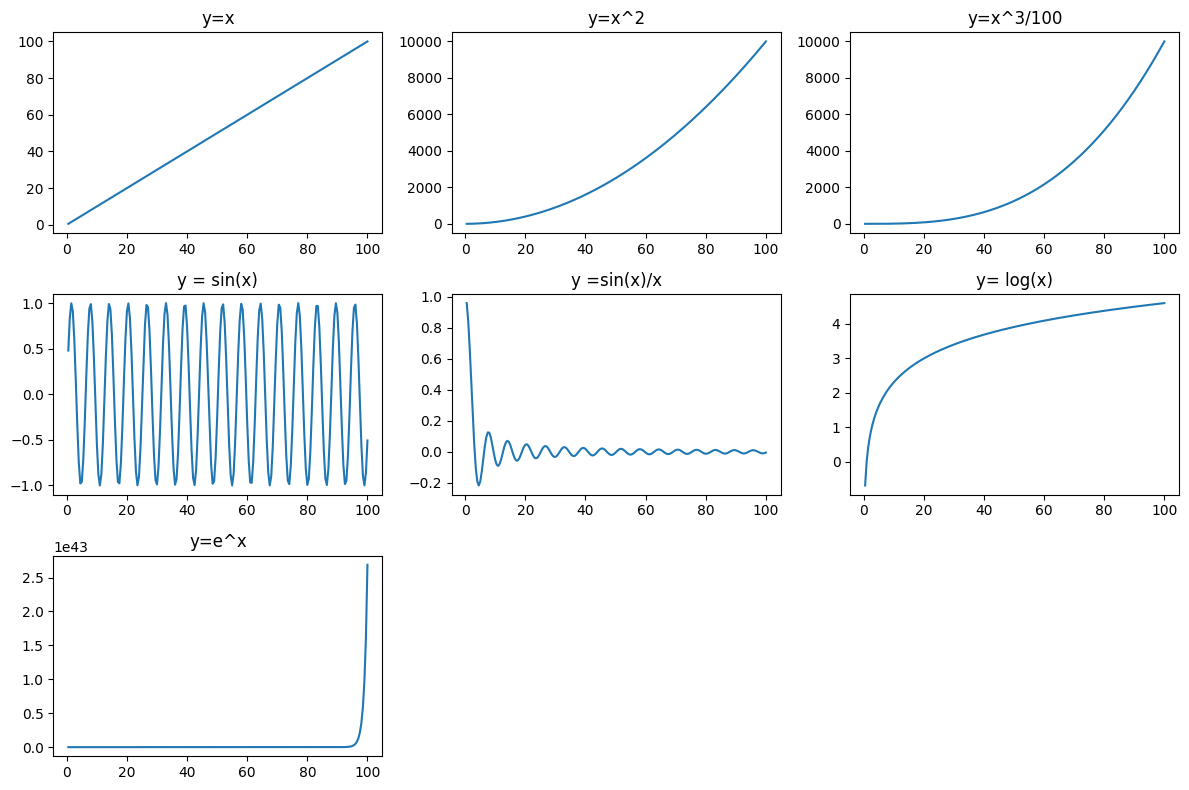

In [18]:

import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x_values = np.arange(0.5, 100.1, 0.5)

# Define the functions
y1 = x_values
y2 = x_values**2
y3 = x_values**3 / 100
y4 = np.sin(x_values)
y5 = np.sin(x_values) / x_values
y6 = np.log(x_values)
y7 = np.exp(x_values)

# Plot the functions
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.plot(x_values, y1)
plt.title('y=x')

plt.subplot(3, 3, 2)
plt.plot(x_values, y2)
plt.title('y=x^2')

plt.subplot(3, 3, 3)
plt.plot(x_values, y3)
plt.title('y=x^3/100')

plt.subplot(3, 3, 4)
plt.plot(x_values, y4)
plt.title('y = sin(x)')

plt.subplot(3, 3, 5)
plt.plot(x_values, y5)
plt.title('y =sin(x)/x')

plt.subplot(3, 3, 6)
plt.plot(x_values, y6)
plt.title('y= log(x)')

plt.subplot(3, 3, 7)
plt.plot(x_values, y7)
plt.title('y=e^x')

plt.tight_layout()
plt.show()


Q10 : Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [19]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

print("DataFrame: \n", df)

# Find the column with the highest standard deviation
std = df.std()
print('\n')
print(std)
print("The column with maximum standard deviation is: ", std.idxmax())

mean = df.mean(axis=1)
print(mean)
print("The row with lowest mean is: ", mean.idxmin())


DataFrame: 
            a         b         c         d         e
0   1.898039  1.541259  1.605508  1.648572  1.952681
1   1.736381  1.834542  1.391677  1.667446  1.722172
2   1.783272  1.998501  1.460453  1.894929  1.672981
3   1.144444  1.058332  1.403148  1.558591  1.426804
4   1.842837  1.154604  1.439782  1.919362  1.994265
5   1.451407  1.775327  1.873649  1.642344  1.332716
6   1.584510  1.962708  1.900856  1.238675  1.849950
7   1.816276  1.588128  1.878451  1.515857  1.885573
8   1.720358  1.515663  1.637489  1.023690  1.243236
9   1.698868  1.210350  1.170052  1.505373  1.433428
10  1.371127  1.113511  1.093021  1.856460  1.178442
11  1.328505  1.796129  1.468631  1.390682  1.283344
12  1.473888  1.753510  1.262210  1.319706  1.188474
13  1.383529  1.275027  1.388006  1.510333  1.094498
14  1.312579  1.488069  1.905118  1.085503  1.099316
15  1.143497  1.547887  1.411297  1.071103  1.557260
16  1.841513  1.611836  1.678292  1.777396  1.653276
17  1.272385  1.260059  1.483986 

Q11: Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 with random numbers in the range [1, 2)
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a Pandas DataFrame with column names "a", "b", "c", "d", "e"
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

# Add a new column "f" as the sum of columns "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create a new column "g" based on the value in column "f"
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where the value in column "g" is "LT8"
num_lt8_rows = len(df[df['g'] == 'LT8'])

# Find the standard deviation of column "f" for rows where "g" is "LT8" and "GT8"
std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()

# Display the DataFrame
print("DataFrame:")
print(df)

# Display additional results
print("\nNumber of rows where 'g' is 'LT8':", num_lt8_rows)
print("Standard deviation of 'f' for 'LT8' rows:", std_lt8)
print("Standard deviation of 'f' for 'GT8' rows:", std_gt8)


DataFrame:
           a         b         c         d         e         f    g
0   1.756348  1.390436  1.011754  1.759359  1.697829  7.615727  LT8
1   1.942702  1.751248  1.609023  1.978302  1.772970  9.054245  GT8
2   1.497457  1.022604  1.517283  1.719359  1.329542  7.086245  LT8
3   1.234786  1.548496  1.391416  1.538937  1.717413  7.431048  LT8
4   1.564084  1.992000  1.008980  1.841017  1.416918  7.822998  LT8
5   1.919311  1.115857  1.621356  1.563723  1.753672  7.973918  LT8
6   1.324818  1.761875  1.138711  1.418965  1.601785  7.246154  LT8
7   1.601269  1.703718  1.258303  1.128966  1.450520  7.142775  LT8
8   1.153261  1.029262  1.793384  1.405952  1.108170  6.490029  LT8
9   1.403930  1.279080  1.823342  1.748287  1.490550  7.745189  LT8
10  1.343408  1.862284  1.825321  1.531525  1.145708  7.708246  LT8
11  1.756462  1.080575  1.415749  1.855638  1.453960  7.562384  LT8
12  1.623679  1.102282  1.811908  1.673561  1.296001  7.507432  LT8
13  1.052364  1.289669  1.779813  1.6

Q12: Write a small piece of code to explain broadcasting in numpy.

In [ ]:
import numpy as np

# Create a 2x3 array
arr1 = np.array([[1, 2, 3],
                 [4, 5, 6]])

# Create a 1x3 array
arr2 = np.array([10, 20, 30])

# Perform element-wise addition using broadcasting
result = arr1 + arr2

# Display the original arrays and the result
print("Array 1:")
print(arr1)

print("\nArray 2:")
print(arr2)

print("\nResult after broadcasting:")
print(result)

Array 1:
[[1 2 3]
 [4 5 6]]

Array 2:
[10 20 30]

Result after broadcasting:
[[11 22 33]
 [14 25 36]]


Q13: Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [20]:
import numpy as np

def my_argmin(arr):
    min_value = np.min(arr)
    index = np.where(arr == min_value)[0]
    return index[0]

arr = np.array([7,8,2,4,3,1,6,8,0])
custom_index = my_argmin(arr)
numpy_argmin = np.argmin(arr)

print("Custom argmin result:", custom_index)
print("NumPy argmin result:", numpy_argmin)


Custom argmin result: 8
NumPy argmin result: 8
